# __Datenbereinigung Teil 1: Filterung der Daten__

In diesem Schritt wird eine erste Bereinigung der Daten durchgeführt. Es werden zudem die Dateien für die Analyse der Gesamtdaten und für die Analyse der Anforderungen erstellt.

Dieser Teil funktioniert nur mit Daten von JobCloud

In [1]:
# Import der benötigten Libraries
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import re
import os

# Working-Directory
os.chdir('C:/Users/Sven Konermann/Documents/Master/2_Semester/aF_E_Faelle/Unterlagen/00_all')

In [2]:
# Einlesen der Stellenanzeigen
data_orig = pd.read_csv("Subset_all.csv", sep=";")
data_orig.shape

(160477, 19)

In [3]:
# Doppelte Werte im Text und in der ID löschen
data = data_orig
data = data.drop_duplicates(subset='ad_id', keep="last")
data = data.drop_duplicates(subset='text', keep="last")
data.shape

(54655, 19)

In [4]:
# Lösche alle fremdsprachigen Anzeigen
data = data.drop(data.query('language_code != "de"').index)
data.shape

(41924, 19)

In [5]:
# Spalte mit Jahr erstellen
data['active_start_on'] = data['active_start_on'].astype('datetime64')
data['active_end_on'] = data['active_end_on'].astype('datetime64')
data['year'] = data['active_start_on'].dt.year

C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '19.06.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '14.03.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '19.02.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '19.03.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konerm

C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '23.11.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '15.12.2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '23.10.2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '25.09.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konerm

C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '26.09.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '28.02.2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '26.11.2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Sven Konermann\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '21.05.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,


In [6]:
# Spalten löschen, die nicht benötigt werden
data = data.drop(['jobcategory_name', 'lvl1_jobcategory_name', 'customer_short_name', 'customer_segment', 'duration', 'customer_id', 'teaser', 'zip_code', 'language_code', 'branchen_name', 'customer_branche_name', 'lvl1_region_name', 'region_name'], axis = 1)
data.head(5)

,Unnamed: 0,ad_id,active_start_on,active_end_on,title,text,year
6,6,jobsse-5759852,2014-10-04,2014-05-05,IT-Projektleiter/in 100 %,"IT-Projektleiter/in, Ref.-Nr. 39892D Be...",2014
7,7,jobsse-5879310,2014-06-19,2014-07-14,Projektleiter SAP Inkasso / Exkasso (FS-CD) (w/m),"<div id=""jobTplContainer"" style=""overflow: hid...",2014
12,12,jobsse-5700844,2014-03-14,2014-03-26,ICT-Projektleiter (60-70%),<p><strong>Referenz Nr.:</strong> 4777SM <...,2014
13,13,jobsse-6271598,2015-02-19,2015-02-27,Projektleiter im SAP-Umfeld,<p><strong>Referenz Nr.: </strong>5045TG <s...,2015
15,15,jobsse-5634978,2014-07-02,2014-11-02,IT- Projektleiter (Senior),<p>Hauptaufgaben: <br />- Management von gross...,2014


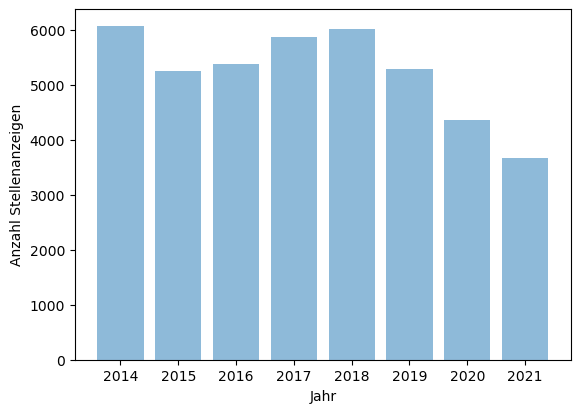

In [7]:
# Anzahl Inserate pro Jahr
objects = ('2014', '2015', '2016', '2017', '2018','2019','2020', '2021')

y_pos       = np.arange(len(objects))
performance = [len(data.query('year == 2014').index),
              len(data.query('year == 2015').index),
              len(data.query('year == 2016').index),
              len(data.query('year == 2017').index),
              len(data.query('year == 2018').index),
              len(data.query('year == 2019').index),
              len(data.query('year == 2020').index),
              len(data.query('year == 2021').index)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='horizontal')
plt.ylabel('Anzahl Stellenanzeigen')
plt.xlabel('Jahr')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('Anzahl_Inserate_Gesamtdaten.pdf')

plt.show()

In [8]:
# Abspeichern der Datei in ein csv
data.to_csv("Inserate_Gesamtdatenanalyse.csv", sep=";")

In [9]:
# Filterung der Stellenanzeigen mit Listenelementen
data_listen = data[data['text'].str.contains('<li|</li', regex=True, flags=re.IGNORECASE, na=False)]
data_listen.shape

(25100, 7)

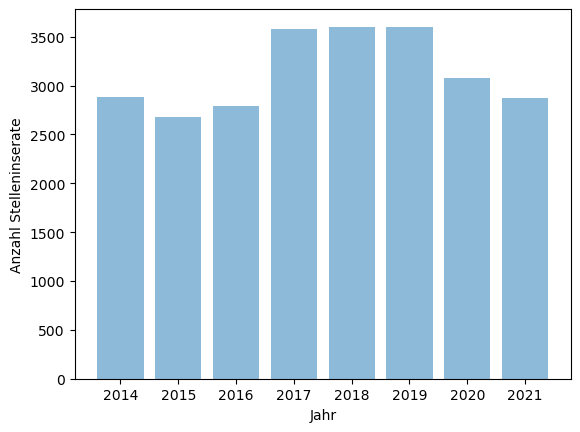

In [10]:
# Anzahl Inserate nach Jahr
objects = ('2014', '2015', '2016', '2017', '2018','2019','2020', '2021')
y_pos = np.arange(len(objects))
performance = [len(data_listen.query('year == 2014').index),
              len(data_listen.query('year == 2015').index),
              len(data_listen.query('year == 2016').index),
              len(data_listen.query('year == 2017').index),
              len(data_listen.query('year == 2018').index),
              len(data_listen.query('year == 2019').index),
              len(data_listen.query('year == 2020').index),
              len(data_listen.query('year == 2021').index)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='horizontal')
plt.ylabel('Anzahl Stelleninserate')
plt.xlabel('Jahr')
plt.savefig('Anzahl_Inserate_Anforderungsdaten.pdf')

plt.show()

In [11]:
# Speichern und Exportieren der Daten pro Jahr für die Analyse der Anforderungen 
data_listen.to_csv("Inserate_Anforderungsanalyse.csv", sep=";")

PermissionError: [Errno 13] Permission denied: 'Inserate_Anforderungsanalyse.csv'